# Logistic Regression

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')
%matplotlib inline

In [2]:
try:
    os.chdir(os.path.join(os.path.dirname(os.getcwd()), r'mlclass-ex2-006\mlclass-ex2'))
    print(os.getcwd())
except:
    pass

P:\2019 Study\Python\coursera-mlclass-ex-python\mlclass-ex2-006\mlclass-ex2


## Logistic Function
probability $p$, odd $\frac{p}{1-p}$, log-odd (logit) function $ln\frac{p}{1-p}$

C:\Users\Peixin\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


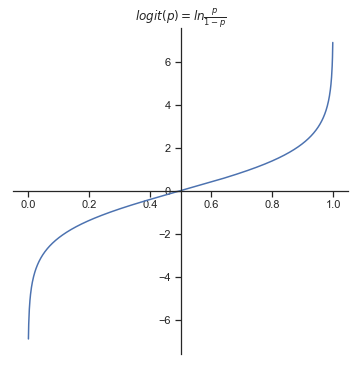

In [3]:
def logit(x):
    return np.log(x/(1-x))

p = np.linspace(0, 1, 1000, endpoint=False)
fig, ax = plt.subplots(figsize=(6,6))
# Move left y-axis and bottim x-axis to centre, passing (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title(r'$logit(p) = ln \frac{p}{1-p}$')
ax.plot(p, logit(p))
None

The inverse of logit function $t=ln\frac{p}{1-p}$, is **sigmoid function** $p=\sigma(t)=\frac{1}{1+e^{-t}}$

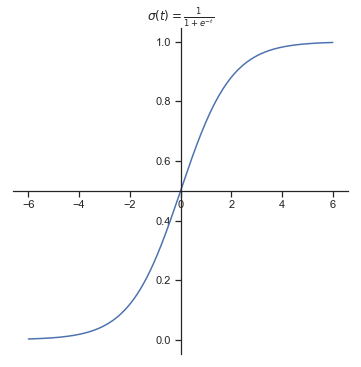

In [4]:
def sig(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-6, 6, 1000)
fig, ax = plt.subplots(figsize=(6,6))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title(r'$\sigma(t)=\frac{1}{1+e^{-t}}$')
ax.plot(t, sig(t))
None

## Visualizing the data

In [5]:
data1 = pd.read_csv('ex2data1.txt', names=['s1','s2','y'])

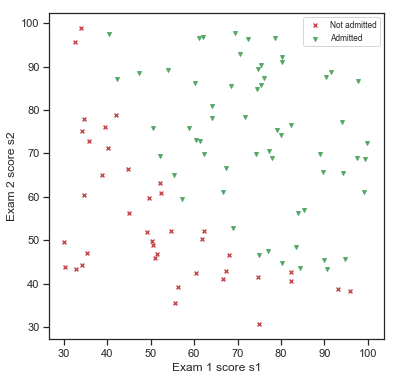

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data1.s1[data1.y==0], data1.s2[data1.y==0], s=15, c='r', marker='x', label='Not admitted')
ax.scatter(data1.s1[data1.y==1], data1.s2[data1.y==1], s=15, c='g', marker='v', label='Admitted')
ax.set_xlabel('Exam 1 score s1')
ax.set_ylabel('Exam 2 score s2')
ax.legend(fontsize='small')
None

## Logistic Regression

Logistic regression is a classification algorithm commonly used to estimate the probability $\hat{p}^{(i)}$ that a instance $i$ belongs to a class. 

If $\hat{p}^{(i)}>50\%$ or $\theta^\top x^{(i)}>0$, predicted label $\hat{y}^{(i)}=1$; else $\hat{y}^{(i)}=0$.

where $p$ is output as logistic (sigmoid function) of weighted sum of features, namely $h_\theta(x)=\frac{1}{1+e^{-\theta^\top x}} \in (0, 1)$

The problem is equivalent to find the optimal weight $\hat{\theta}$ such that some cost function $J(\theta)$ reaches minimum.

### Cost function and gradient

### Scikit-learn Fit

[Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [7]:
from sklearn.linear_model import LogisticRegression

X = data1.loc[:, 's1':'s2'].to_numpy().reshape(-1, 2)
y = data1.y.to_numpy()

In [8]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
log_reg.predict(X[0].reshape(1,-1))

array([0], dtype=int64)

In [10]:
log_reg.predict([[95,98]])

array([1], dtype=int64)

In [11]:
print('learning score =',log_reg.score(X,y))
print('regression coefficient =', log_reg.intercept_, log_reg.coef_)

learning score = 0.89
regression coefficient = [-25.05219314] [[0.20535491 0.2005838 ]]


### Decision Function

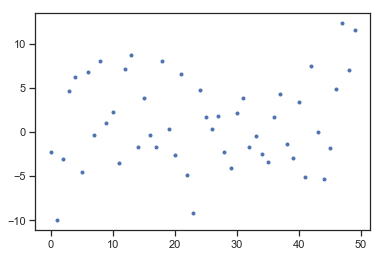

In [12]:
plt.plot(log_reg.decision_function(X[:50,:]), '.')

### Decision Boundary
The decision boundary here, is all $x=(s1,s2)$ such that probability of $y=\sigma(\theta^\top {\bf x})  =\frac{1}{2}$, namely $\{x=(s1,s2)~|~\theta^\top {\bf x} = 0\}$.

In [13]:
X.min(axis=0)  # minimum of s1 and s2

array([30.05882245, 30.60326323])

In [14]:
# left_right = np.array([X.min(axis=0)[0], 100])
# boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

Fancy plot of decision boundaries.

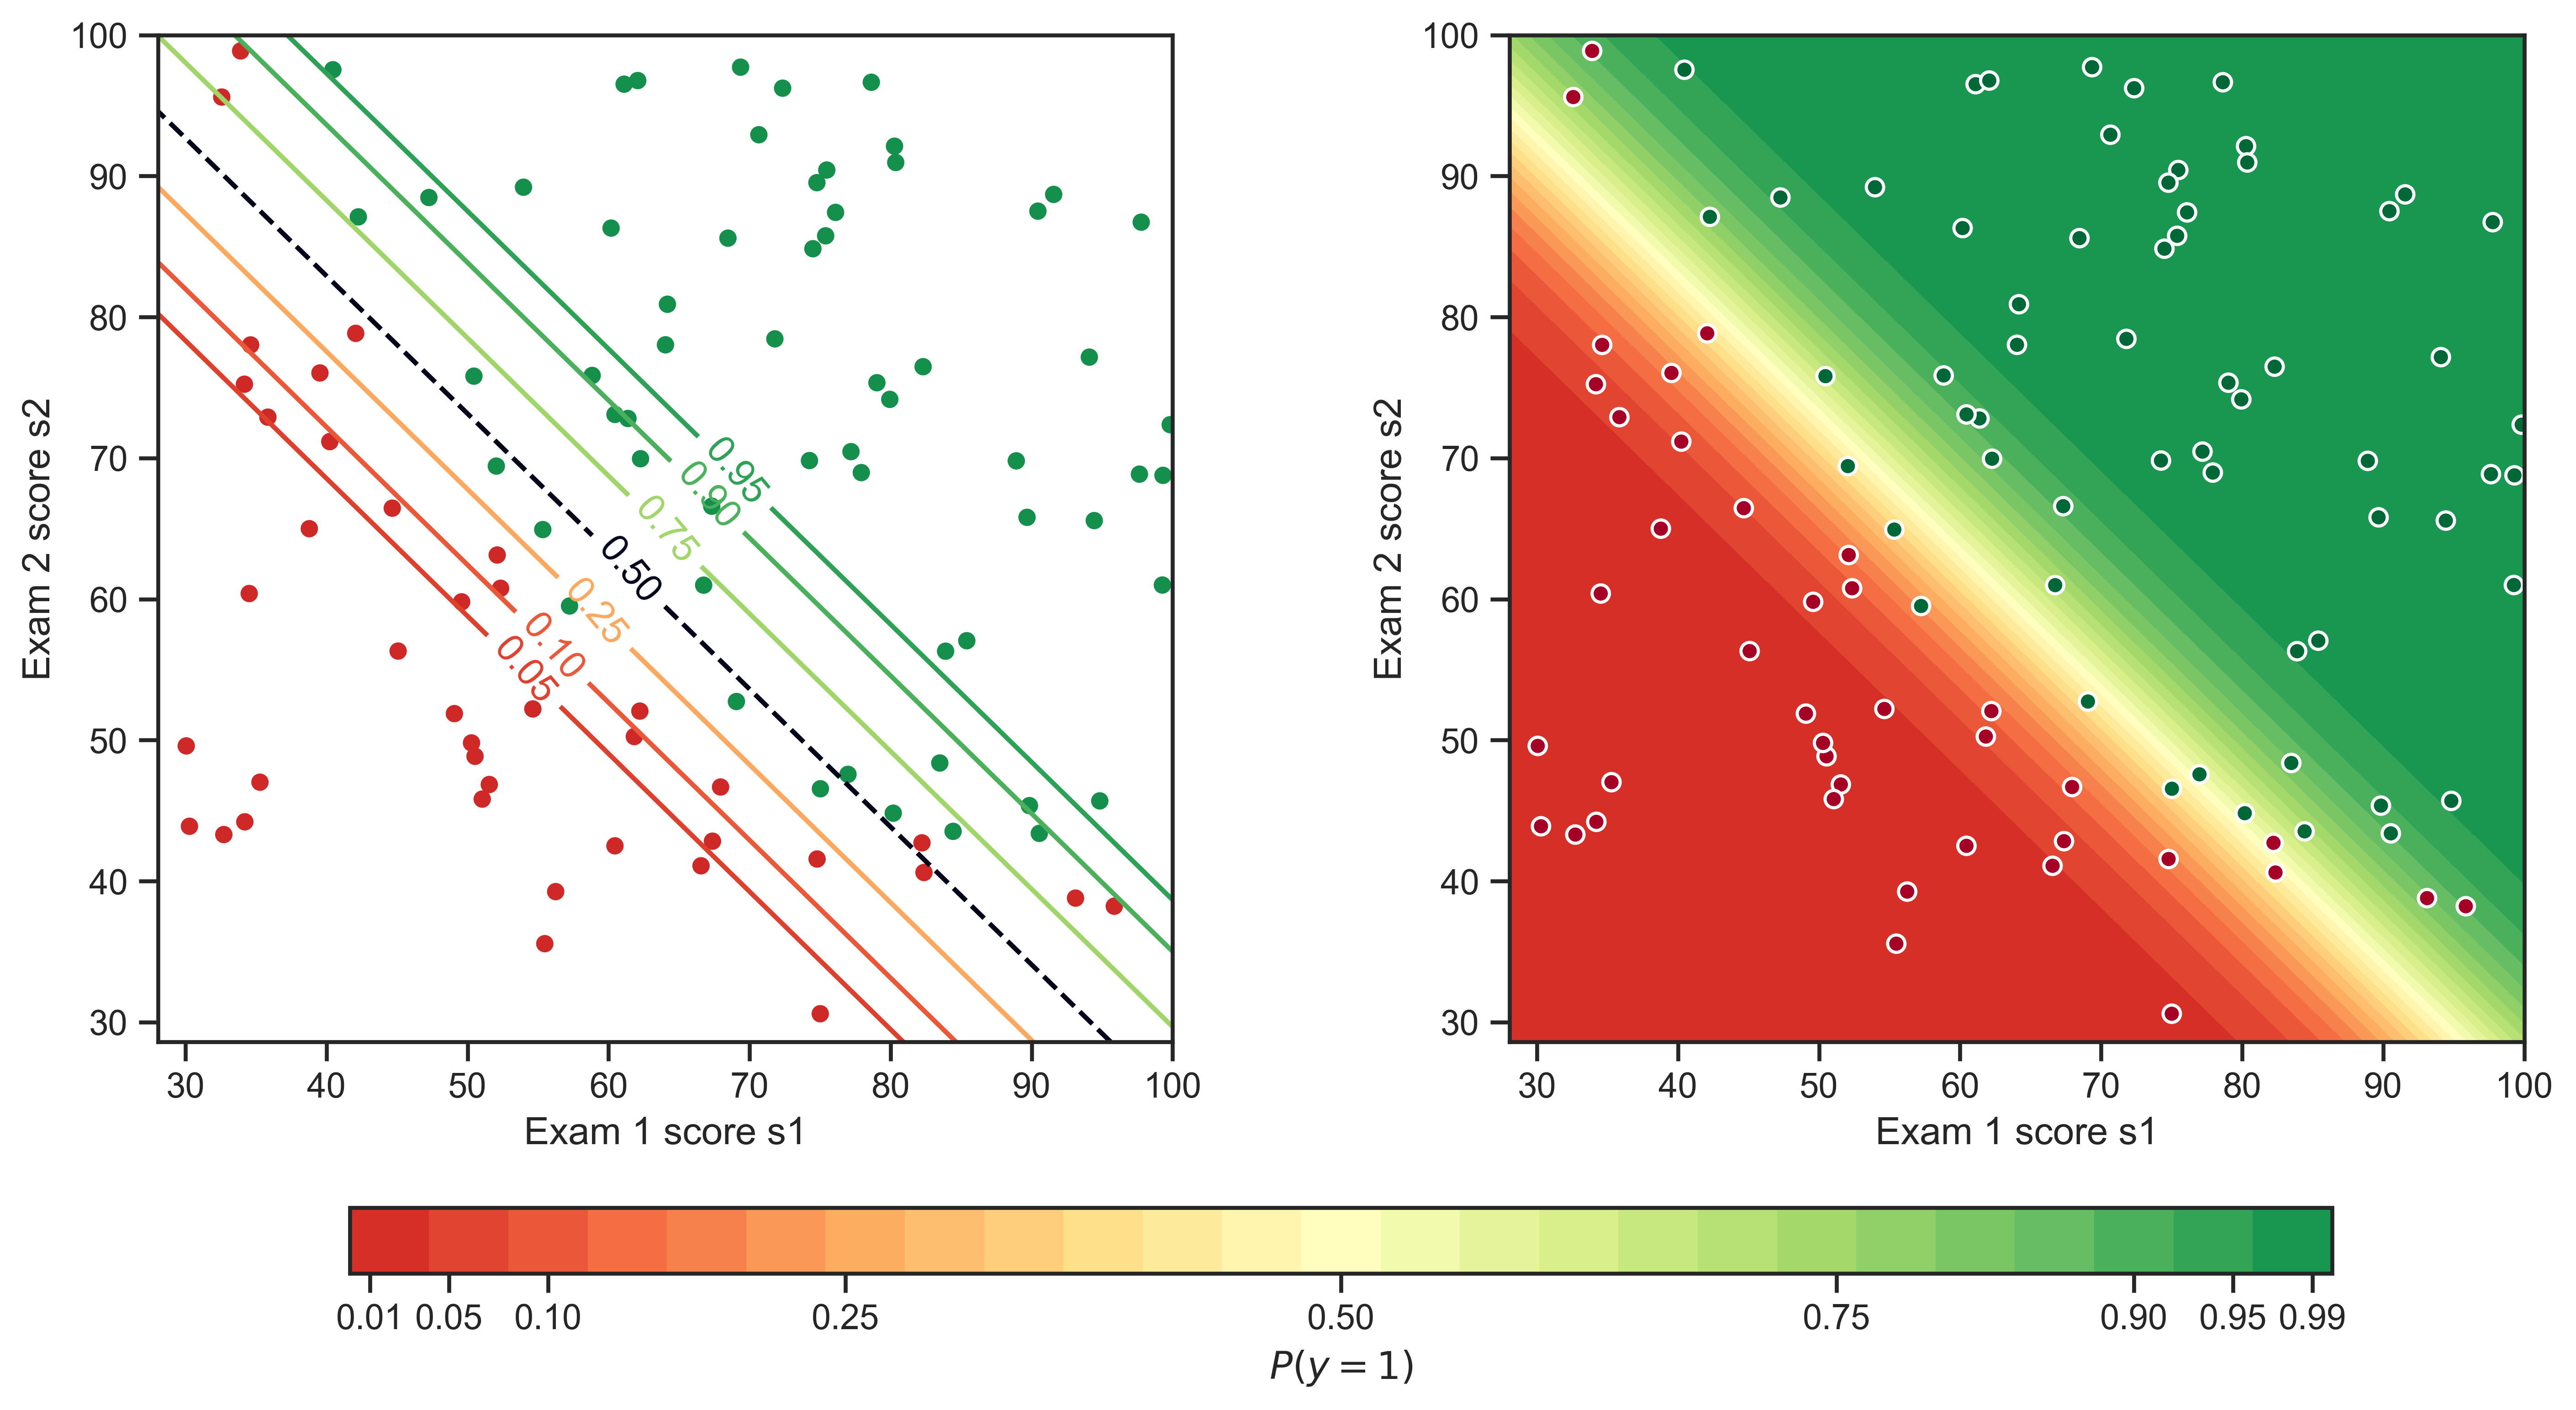

In [15]:
# Data from data1
p = log_reg.predict_proba(X)

# Data grid from 0 to 100 to draw contour
x_1D = np.linspace(0, 100, 101)
x0, x1 = np.meshgrid(x_1D, x_1D)
X_new = np.array([x0, x1]).T.reshape(-1,2) # permutations of scores
# X_new = np.c_[x0.ravel(), x1.ravel()]
p_new = log_reg.predict_proba(X_new)
pp = p_new[:, 1].reshape(x0.shape)


fig, ax = plt.subplots(nrows=1, ncols=2, dpi=500, figsize=(14,8))

# Contour with data points.
# The black boundary line is to substitute the yellow one.
contour = ax[0].contour(x0, x1, pp, 
                        levels=[0.05, 0.1, 0.25, 0.75, 0.9, 0.95], 
                        cmap="RdYlGn", vmin=-0.1, vmax=1.1)
boundary = ax[0].contour(x0, x1, pp, levels=[0.5], linestyles='--')
ax[0].scatter(X[:,0], X[:,1], c=y, marker='o', s=20, cmap="RdYlGn", vmin=-0.1, vmax=1.1)
ax[0].clabel(contour, inline_spacing=-1, fontsize=12, fmt='%1.2f')
ax[0].clabel(boundary, inline_spacing=-1, fontsize=12, fmt='%1.2f')
ax[0].set(xlabel='Exam 1 score s1',
          ylabel='Exam 2 score s2', 
          xlim=(X.min(axis=0)[0] - 2, 100), 
          ylim=(X.min(axis=0)[1] - 2, 100),
          aspect='equal')

# Contour filled.
contourf = ax[1].contourf(x0, x1, pp, levels=30, 
                         cmap="RdYlGn", vmin=-0.1, vmax=1.1)
ax[1].scatter(X[:,0], X[:,1], c=y, marker='o', s=30, cmap="RdYlGn", edgecolor='white', linewidth=1)
ax[1].set(xlabel='Exam 1 score s1',
          ylabel='Exam 2 score s2', 
          xlim=(X.min(axis=0)[0] - 2, 100), 
          ylim=(X.min(axis=0)[1] - 2, 100),
          aspect='equal')

cbar = fig.colorbar(contourf, ax=ax, orientation='horizental', pad=0.12, shrink=0.8, aspect=30)
cbar.set_ticks([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
cbar.set_label("$P(y = 1)$")
# fig.savefig('Decision Boundaries.png')
None